# K-means and Use Cases

In [134]:
%matplotlib inline

from sklearn.cluster import KMeans as km
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import cv2
# from skimage import io
import time

## Segmentation

In [135]:
df = pd.read_csv("./data/Mall_Customers.csv")

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [136]:
X = df.iloc[:, [3,4]].values

X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Finding the Optimal `K`

We will be using the `Elbow graph method`

Our Loop below will first fit the `K-means` algorithm to our data and then we will compute the within cluster sum of squares and append the results to our _wcss_ list

In [137]:
wcss = []

for i in range (1, 11):
    model = km(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)


* `i` above is between 1-10 numbers. 
* `init` parameter is the random initialization method, we select kmeans++ method.
* `max_iter` parameter the maximum number of iterations there can be to find the final clusters when the K-meands algorithm is running. we enter the default value of 300
* the next parameter is `n_init` which is the number of times the K_means algorithm will be run with
different initial centroid.

`kmeans inertia_` attribute is:  Sum of squared distances of samples #to their closest cluster center.

**Plot the elbow graph**

Text(0, 0.5, 'WCSS')

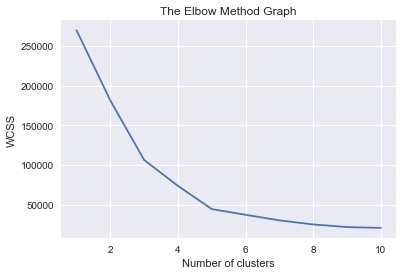

In [138]:
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

## Training the model

In [139]:
model  = km(max_iter=500, n_clusters=5)

model.fit(X)



KMeans(max_iter=500, n_clusters=5)

### Finding the centroid of the clusters

In [140]:
clusters = model.cluster_centers_

clusters

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

### Plotting the clusters `centroid`

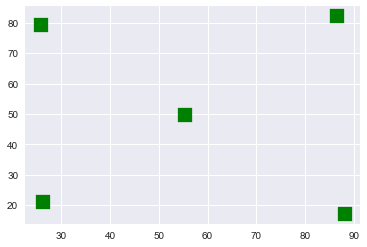

In [141]:
for clust in clusters:
  plt.scatter(clust[0], clust[1], s = 200, c ="g", marker = "s")

plt.show()

### Plotting the `clusters` && her `centroid`  

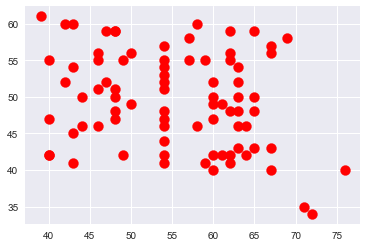

In [142]:
y_kmeans = model.fit_predict(X)

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')

**Joining all together**

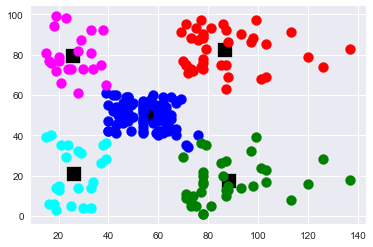

In [143]:
colors = ["blue", "red", "green", "cyan", "magenta"]

for clust in clusters:
  plt.scatter(clust[0], clust[1], s = 200, c ="black", marker = "s")

for i in range(5):
  plt.scatter(X[y_kmeans==i, 0], X[y_kmeans==i, 1], s=100, c=colors[i], label ="Cluster %d" % (i))
  

plt.show()